# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting Seaborn style
sns.set(style="whitegrid")

# Loading Dataset

In [2]:
df = pd.read_csv('HR_Analytics.csv')

In [3]:
df.head

<bound method NDFrame.head of        EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
0      RM297   18    18-25       Yes      Travel_Rarely        230   
1      RM302   18    18-25        No      Travel_Rarely        812   
2      RM458   18    18-25       Yes  Travel_Frequently       1306   
3      RM728   18    18-25        No         Non-Travel        287   
4      RM829   18    18-25       Yes         Non-Travel        247   
...      ...  ...      ...       ...                ...        ...   
1475   RM412   60      55+        No      Travel_Rarely        422   
1476   RM428   60      55+        No  Travel_Frequently       1499   
1477   RM537   60      55+        No      Travel_Rarely       1179   
1478   RM880   60      55+        No      Travel_Rarely        696   
1479  RM1210   60      55+        No      Travel_Rarely        370   

                  Department  DistanceFromHome  Education EducationField  ...  \
0     Research & Development                 3  

In [4]:
print(df.shape)
print(df.info())

(1480, 38)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 1

# Data Preprocessing

In [5]:
# Handling missing values
df.fillna(method='ffill', inplace=True)

# Encoding categorical variables if necessary
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Example of creating a new feature
df['TotalWorkingYears_bin'] = pd.cut(df['TotalWorkingYears'], bins=[0, 5, 10, 15, 20, np.inf], labels=['0-5', '5-10', '10-15', '15-20', '20+'])

# Display summary of the processed data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   EmpID                     1480 non-null   object  
 1   Age                       1480 non-null   int64   
 2   AgeGroup                  1480 non-null   object  
 3   Attrition                 1480 non-null   object  
 4   BusinessTravel            1480 non-null   object  
 5   DailyRate                 1480 non-null   int64   
 6   Department                1480 non-null   object  
 7   DistanceFromHome          1480 non-null   int64   
 8   Education                 1480 non-null   int64   
 9   EducationField            1480 non-null   object  
 10  EmployeeCount             1480 non-null   int64   
 11  EmployeeNumber            1480 non-null   int64   
 12  EnvironmentSatisfaction   1480 non-null   int64   
 13  Gender                    1480 non-null   int64 

C:\Users\aryan\AppData\Local\Temp\ipykernel_30884\2269239724.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [6]:
# Drop duplicates if any
df = df.drop_duplicates()
print(df.shape)

(1473, 39)


In [7]:
print(df.columns)

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab',
       'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'TotalWorkingYears_bin'],
      dtype='object')


In [8]:
# Describe the dataset
print(df.describe().round(2))

           Age  DailyRate  DistanceFromHome  Education  EmployeeCount  \
count  1473.00    1473.00           1473.00    1473.00         1473.0   
mean     36.92     802.66              9.20       2.91            1.0   
std       9.13     403.25              8.11       1.02            0.0   
min      18.00     102.00              1.00       1.00            1.0   
25%      30.00     465.00              2.00       2.00            1.0   
50%      36.00     802.00              7.00       3.00            1.0   
75%      43.00    1157.00             14.00       4.00            1.0   
max      60.00    1499.00             29.00       5.00            1.0   

       EmployeeNumber  EnvironmentSatisfaction   Gender  HourlyRate  \
count         1473.00                  1473.00  1473.00     1473.00   
mean          1026.98                     2.72     0.60       65.83   
std            603.22                     1.09     0.49       20.35   
min              1.00                     1.00     0.00   

# Visualizing

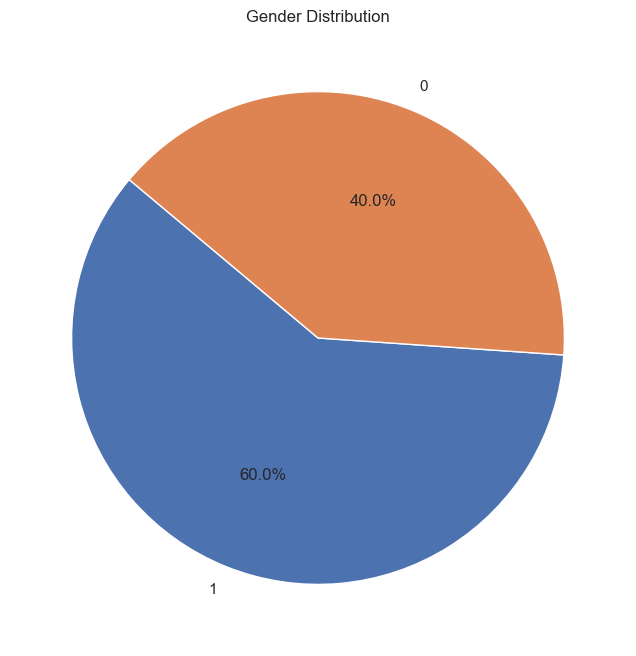

In [9]:
# Creating a pie chart for gender distribution
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()


C:\Users\aryan\AppData\Local\Temp\ipykernel_30884\1156534430.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary.values, y=avg_salary.index, palette='coolwarm')


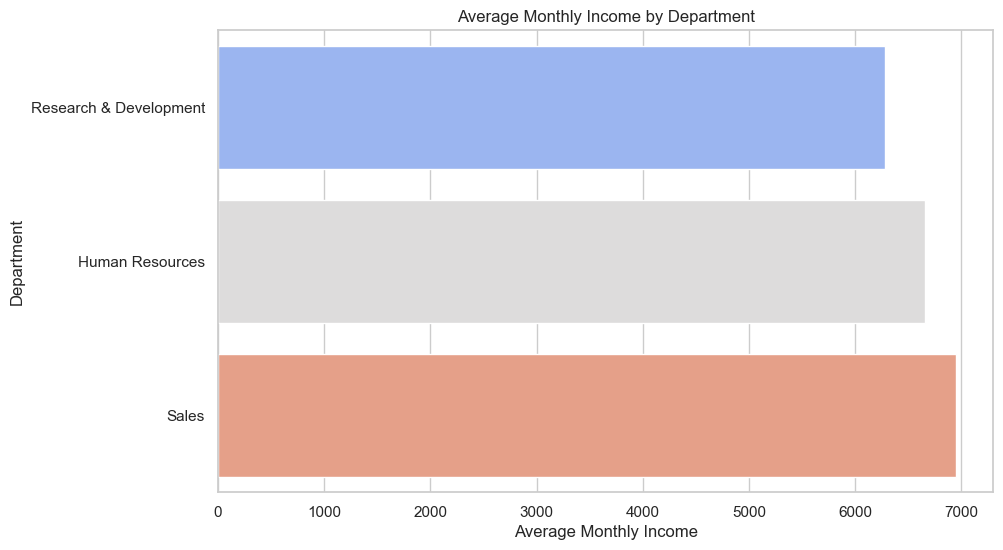

In [10]:
plt.figure(figsize=(10, 6))
avg_salary = df.groupby('Department')['MonthlyIncome'].mean().sort_values()

sns.barplot(x=avg_salary.values, y=avg_salary.index, palette='coolwarm')
plt.title('Average Monthly Income by Department')
plt.xlabel('Average Monthly Income')
plt.ylabel('Department')
plt.show()


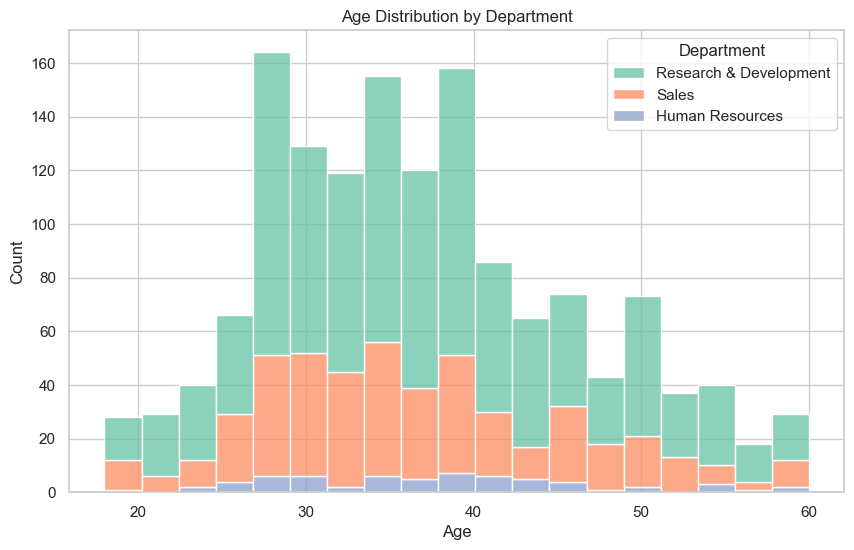

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Department', multiple='stack', palette='Set2')
plt.title('Age Distribution by Department')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


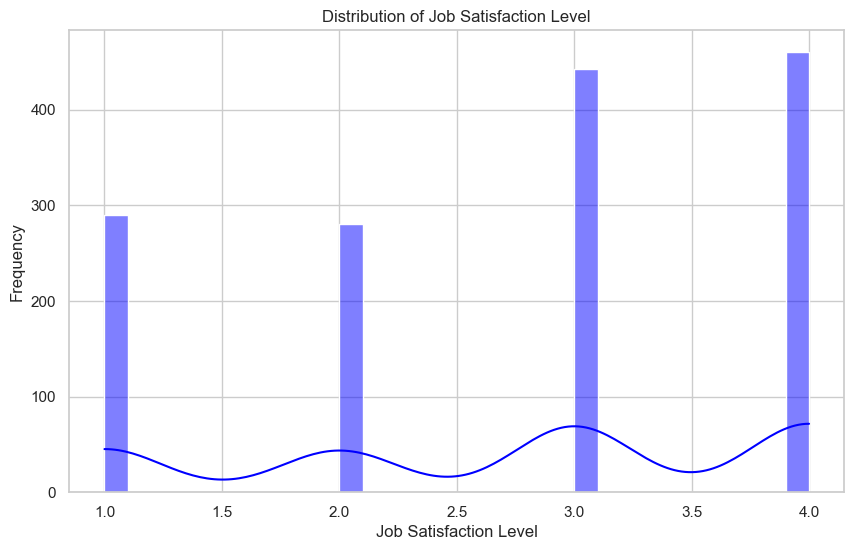

In [12]:
# Distribution of Job Satisfaction
plt.figure(figsize=(10, 6))
sns.histplot(df['JobSatisfaction'], bins=30, kde=True, color='blue')
plt.title('Distribution of Job Satisfaction Level')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_30884\3436761315.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, palette='viridis')


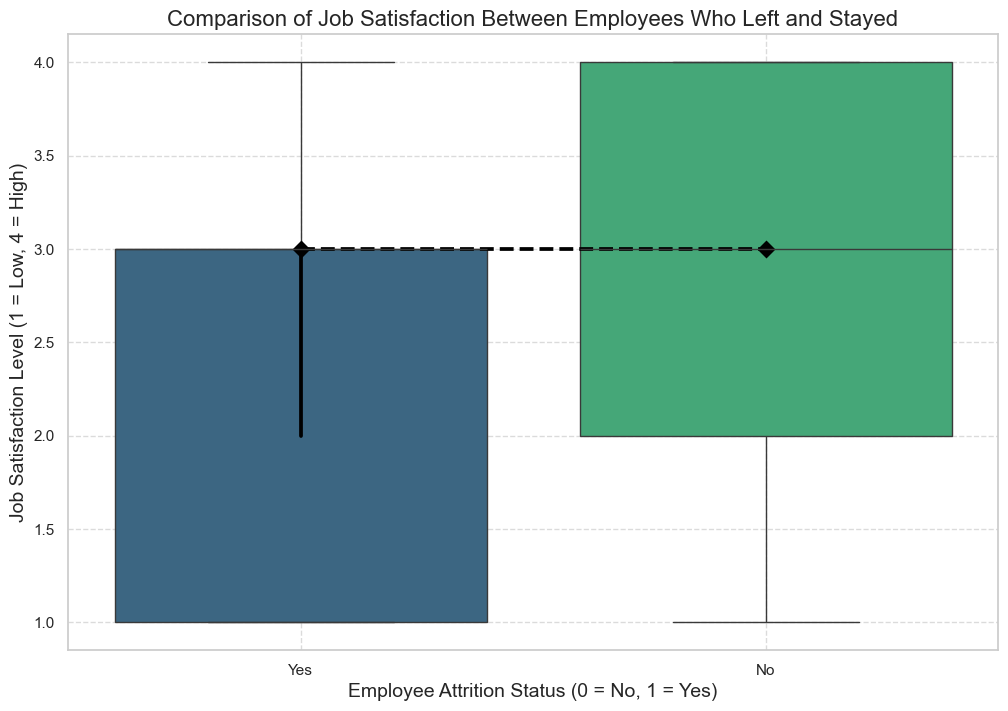

In [13]:
plt.figure(figsize=(12, 8))

# Set the background style
sns.set(style="whitegrid")

# Create a boxplot with enhanced aesthetics
sns.boxplot(x='Attrition', y='JobSatisfaction', data=df, palette='viridis')

# Add a pointplot to show median values for each group
sns.pointplot(x='Attrition', y='JobSatisfaction', data=df, 
              estimator=np.median, color='black', markers='D', linestyles='--')

# Set plot title and labels with improved descriptions
plt.title('Comparison of Job Satisfaction Between Employees Who Left and Stayed', fontsize=16)
plt.xlabel('Employee Attrition Status (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Job Satisfaction Level (1 = Low, 4 = High)', fontsize=14)

# Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

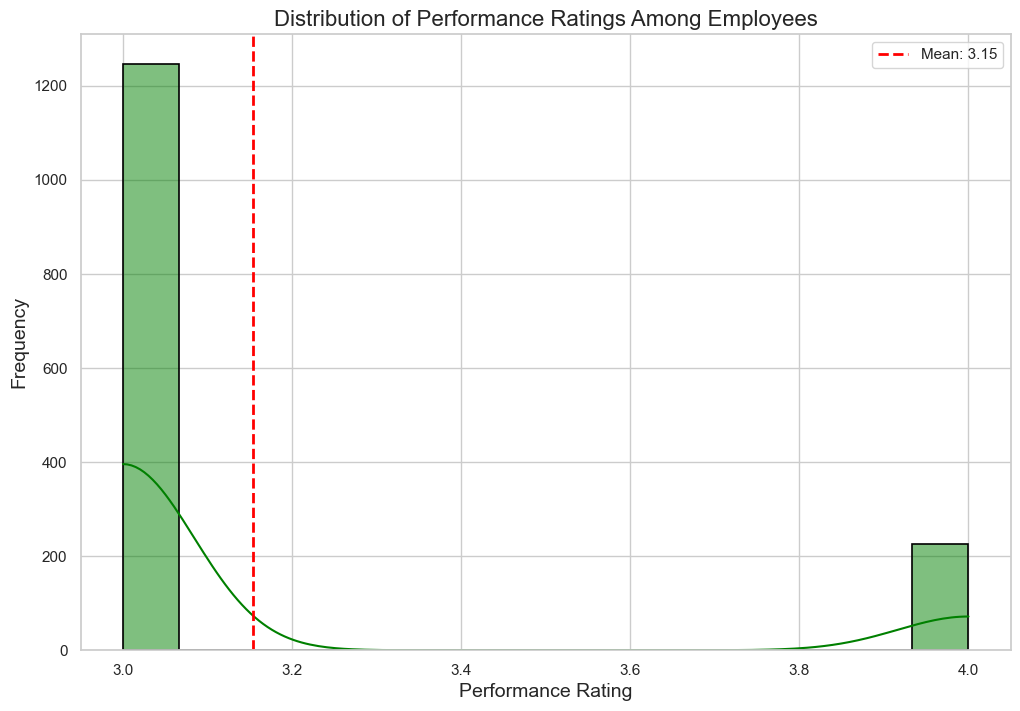

In [14]:
plt.figure(figsize=(12, 8))

# Set the background style
sns.set(style="whitegrid")

# Create a histogram with KDE (Kernel Density Estimate)
sns.histplot(df['PerformanceRating'], bins=15, kde=True, color='green', edgecolor='black', linewidth=1.2)

# Add a vertical line for the mean of Performance Ratings
mean_rating = df['PerformanceRating'].mean()
plt.axvline(mean_rating, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_rating:.2f}')

# Set plot title and labels with improved descriptions
plt.title('Distribution of Performance Ratings Among Employees', fontsize=16)
plt.xlabel('Performance Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a legend to describe the mean line
plt.legend()

# Show the plot
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_30884\2488374748.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SalarySlab', data=df, palette='muted')


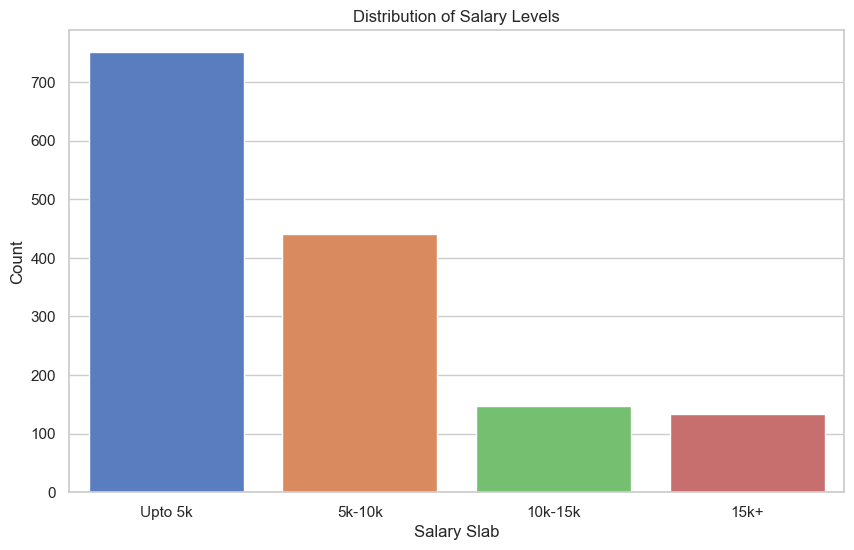

In [15]:
# Analyzing Salary Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='SalarySlab', data=df, palette='muted')
plt.title('Distribution of Salary Levels')
plt.xlabel('Salary Slab')
plt.ylabel('Count')
plt.show()

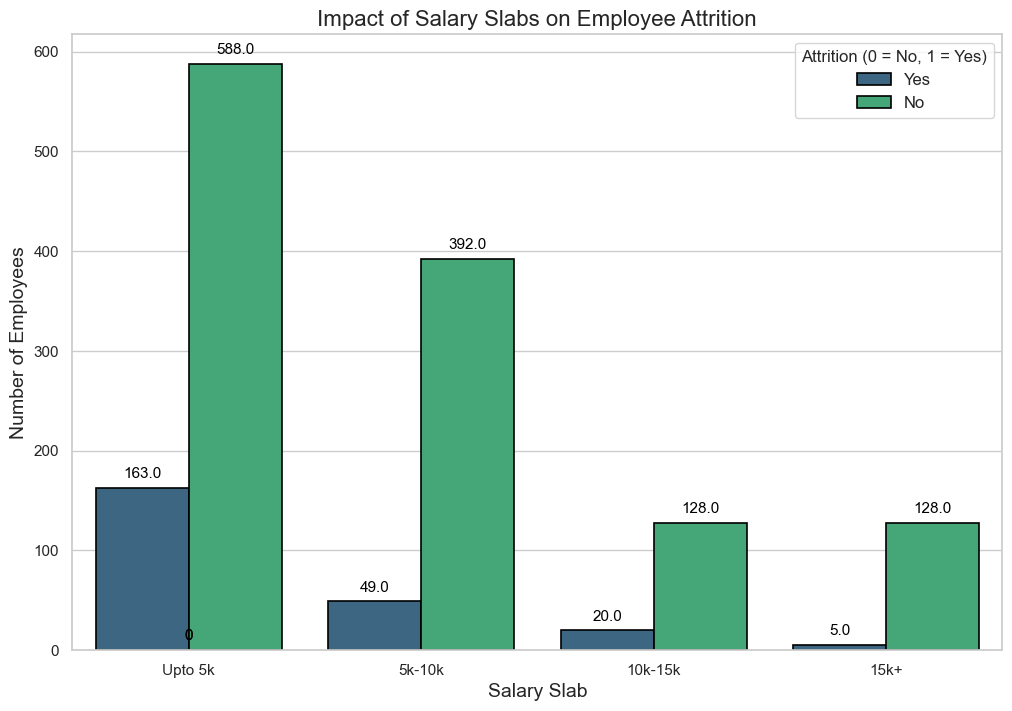

In [16]:
plt.figure(figsize=(12, 8))

# Set the background style
sns.set(style="whitegrid")

# Create a count plot with improved aesthetics
sns.countplot(x='SalarySlab', hue='Attrition', data=df, palette='viridis', edgecolor='black', linewidth=1.2)

# Add percentage labels on top of the bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height), 
                       ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Set plot title and labels with improved descriptions
plt.title('Impact of Salary Slabs on Employee Attrition', fontsize=16)
plt.xlabel('Salary Slab', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)

# Adjust legend title for clarity
plt.legend(title='Attrition (0 = No, 1 = Yes)', fontsize=12)

# Show the plot
plt.show()


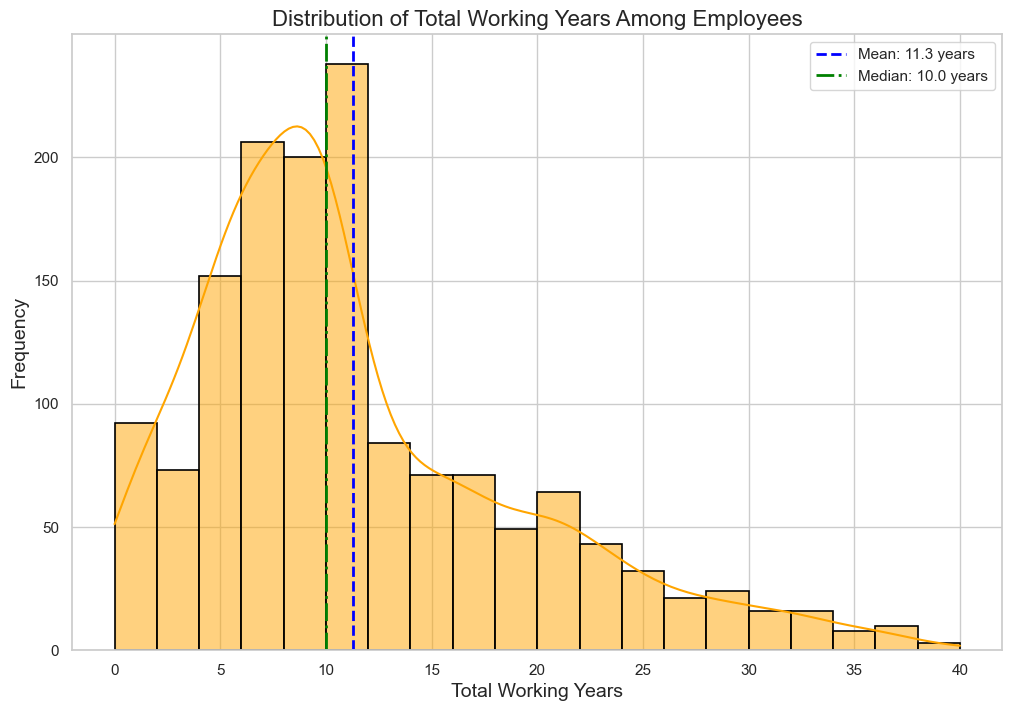

In [17]:
plt.figure(figsize=(12, 8))

# Set the background style
sns.set(style="whitegrid")

# Create a histogram with KDE (Kernel Density Estimate)
sns.histplot(df['TotalWorkingYears'], bins=20, kde=True, color='orange', edgecolor='black', linewidth=1.2)

# Add a vertical line for the mean of Total Working Years
mean_working_years = df['TotalWorkingYears'].mean()
plt.axvline(mean_working_years, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_working_years:.1f} years')

# Add a vertical line for the median of Total Working Years
median_working_years = df['TotalWorkingYears'].median()
plt.axvline(median_working_years, color='green', linestyle='-.', linewidth=2, label=f'Median: {median_working_years:.1f} years')

# Set plot title and labels with improved descriptions
plt.title('Distribution of Total Working Years Among Employees', fontsize=16)
plt.xlabel('Total Working Years', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a legend to explain the mean and median lines
plt.legend()

# Show the plot
plt.show()

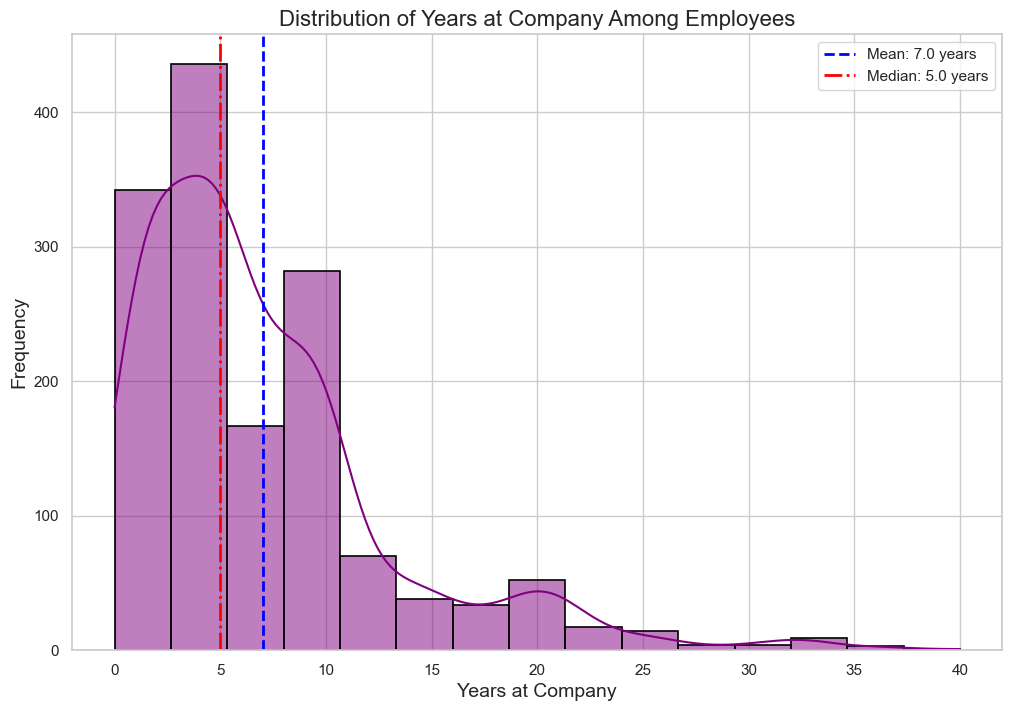

In [18]:
plt.figure(figsize=(12, 8))

# Set the background style
sns.set(style="whitegrid")

# Create a histogram with KDE (Kernel Density Estimate)
sns.histplot(df['YearsAtCompany'], bins=15, kde=True, color='purple', edgecolor='black', linewidth=1.2)

# Add a vertical line for the mean of Years At Company
mean_years_at_company = df['YearsAtCompany'].mean()
plt.axvline(mean_years_at_company, color='blue', linestyle='--', linewidth=2, label=f'Mean: {mean_years_at_company:.1f} years')

# Add a vertical line for the median of Years At Company
median_years_at_company = df['YearsAtCompany'].median()
plt.axvline(median_years_at_company, color='red', linestyle='-.', linewidth=2, label=f'Median: {median_years_at_company:.1f} years')

# Set plot title and labels with improved descriptions
plt.title('Distribution of Years at Company Among Employees', fontsize=16)
plt.xlabel('Years at Company', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Add a legend to explain the mean and median lines
plt.legend()

# Show the plot
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_30884\1173291785.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='YearsAtCompany', data=df, palette='viridis', linewidth=1.2)


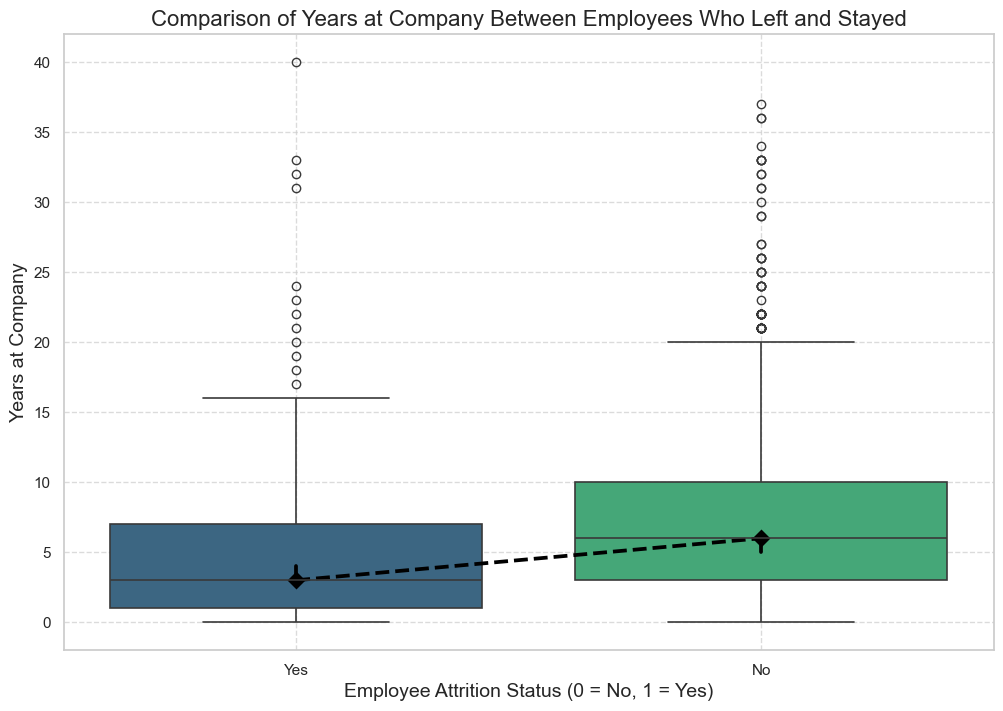

In [19]:
plt.figure(figsize=(12, 8))

# Set the background style
sns.set(style="whitegrid")

# Create a boxplot with enhanced aesthetics
sns.boxplot(x='Attrition', y='YearsAtCompany', data=df, palette='viridis', linewidth=1.2)

# Add a pointplot to show median values for each group
sns.pointplot(x='Attrition', y='YearsAtCompany', data=df, 
              estimator=np.median, color='black', markers='D', linestyles='--', dodge=True)

# Set plot title and labels with improved descriptions
plt.title('Comparison of Years at Company Between Employees Who Left and Stayed', fontsize=16)
plt.xlabel('Employee Attrition Status (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Years at Company', fontsize=14)

# Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_30884\1514300416.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Department', data=df, palette='viridis')


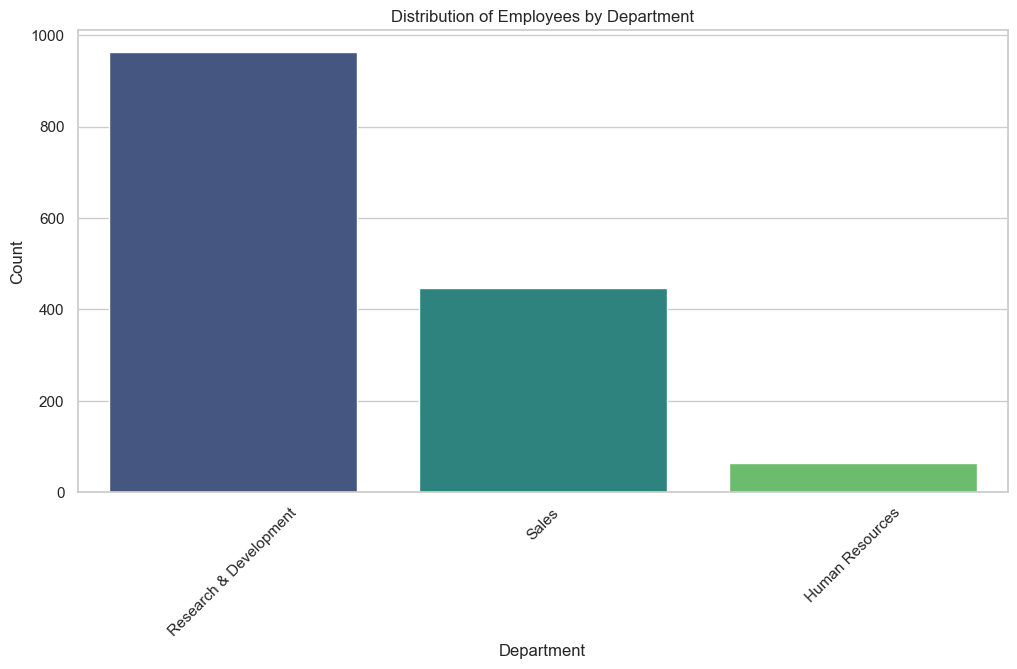

In [20]:
# Department Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Department', data=df, palette='viridis')
plt.title('Distribution of Employees by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

C:\Users\aryan\AppData\Local\Temp\ipykernel_30884\2109771471.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Department', data=df, palette='magma', edgecolor='black', linewidth=1.2)


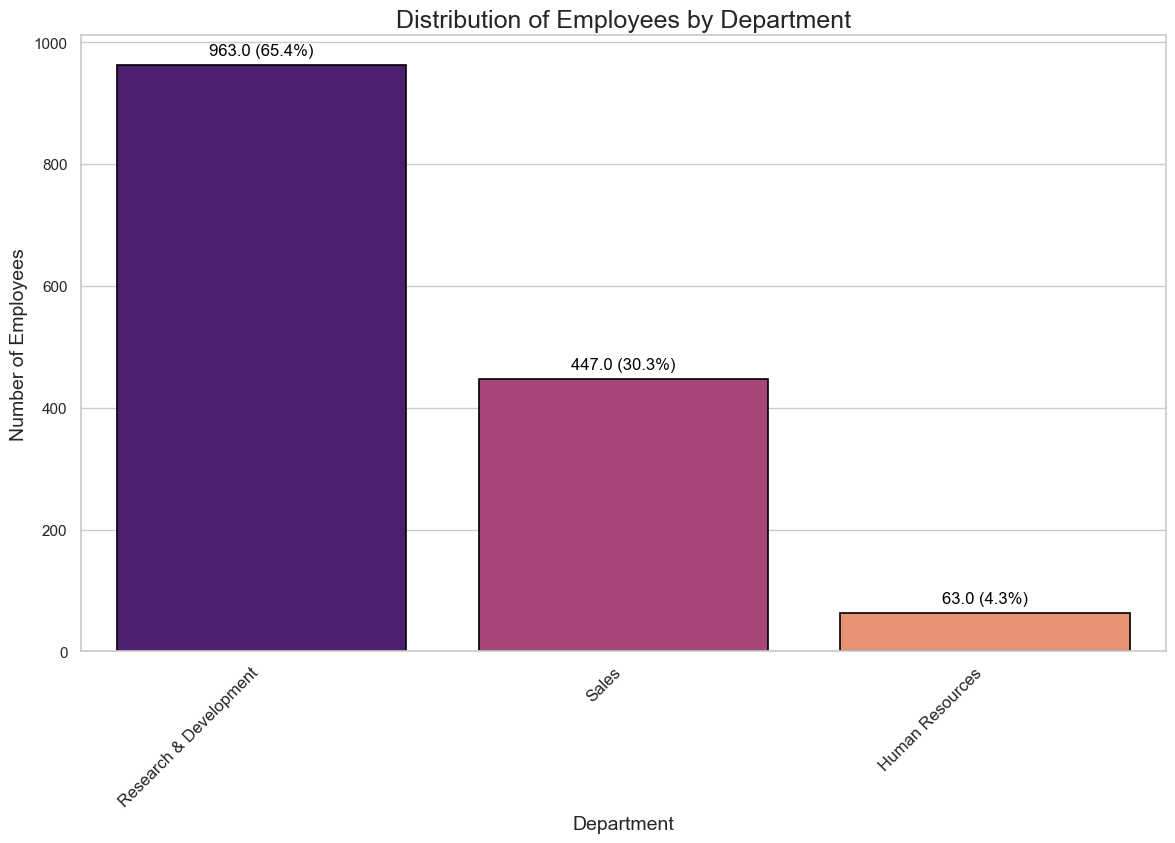

In [21]:
plt.figure(figsize=(14, 8))

# Set the background style
sns.set(style="whitegrid")

# Create a countplot with enhanced aesthetics
sns.countplot(x='Department', data=df, palette='magma', edgecolor='black', linewidth=1.2)

# Add percentage labels on top of the bars
total = len(df['Department'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height} ({height/total:.1%})', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Set plot title and labels with improved descriptions
plt.title('Distribution of Employees by Department', fontsize=18)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)

# Adjust x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Show the plot
plt.show()

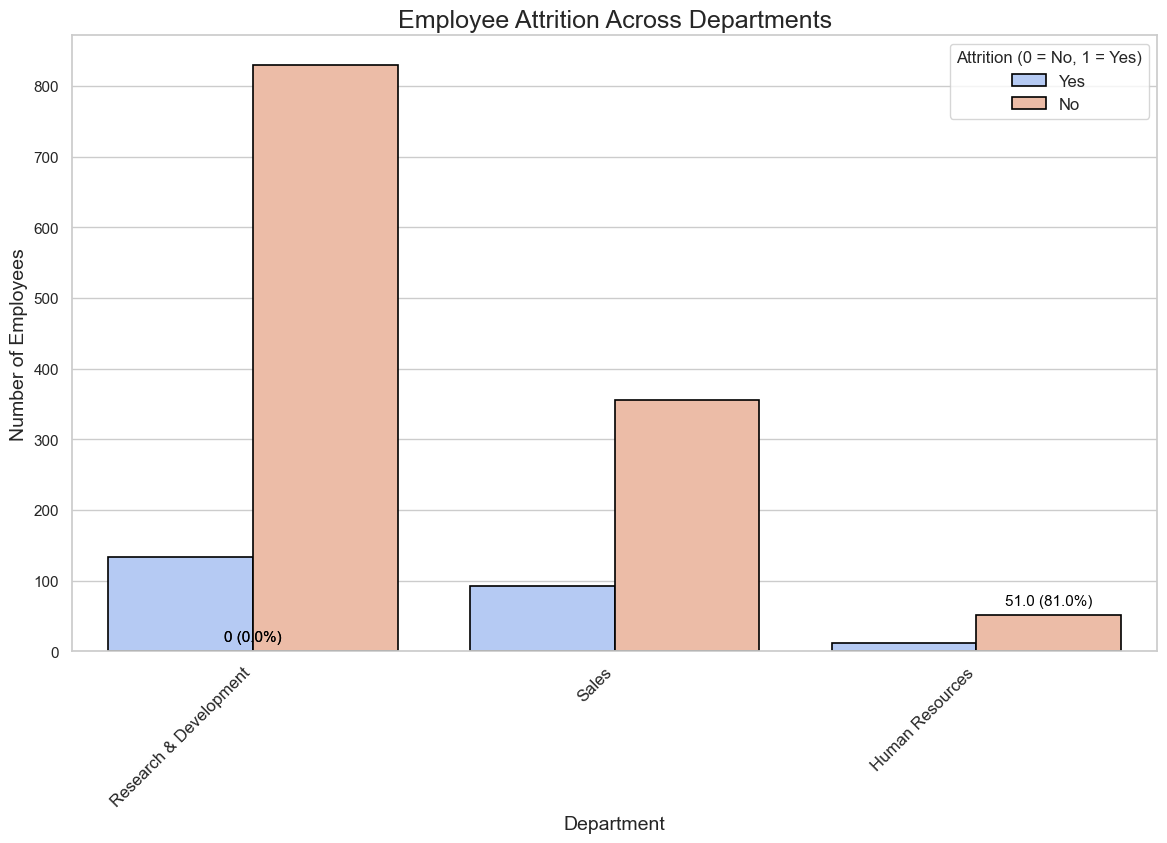

In [22]:
plt.figure(figsize=(14, 8))

# Set the background style
sns.set(style="whitegrid")

# Create a countplot with enhanced aesthetics
sns.countplot(x='Department', hue='Attrition', data=df, palette='coolwarm', edgecolor='black', linewidth=1.2)

# Add percentage labels on top of the bars
total_counts = df['Department'].value_counts().sort_index()
for department in df['Department'].unique():
    department_total = total_counts[department]
    for p in plt.gca().patches:
        if p.get_x() == plt.gca().get_xticks()[list(df['Department'].unique()).index(department)]:
            height = p.get_height()
            plt.gca().annotate(f'{height} ({height/department_total:.1%})',
                               (p.get_x() + p.get_width() / 2., height),
                               ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 5),
                               textcoords='offset points')

# Set plot title and labels with improved descriptions
plt.title('Employee Attrition Across Departments', fontsize=18)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Number of Employees', fontsize=14)

# Adjust x-ticks for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add a legend with a clear title
plt.legend(title='Attrition (0 = No, 1 = Yes)', fontsize=12)

# Show the plot
plt.show()

## Modeling

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [24]:
# Convert 'Attrition' column to binary values if needed
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Verify the conversion
print(df['Attrition'].value_counts())

Attrition
0    1236
1     237
Name: count, dtype: int64


C:\Users\aryan\AppData\Local\Temp\ipykernel_30884\2298730866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [25]:
# Feature selection
features = df[['JobSatisfaction', 'PerformanceRating', 'TotalWorkingYears', 'YearsAtCompany', 'DistanceFromHome']]
target = df['Attrition']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [27]:
# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [28]:
# Predict on the test set
y_pred = model.predict(X_test)

In [29]:
# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\aryan\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
# Print model evaluation metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 85.76%
Confusion Matrix:
[[253   0]
 [ 42   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       253
           1       0.00      0.00      0.00        42

    accuracy                           0.86       295
   macro avg       0.43      0.50      0.46       295
weighted avg       0.74      0.86      0.79       295



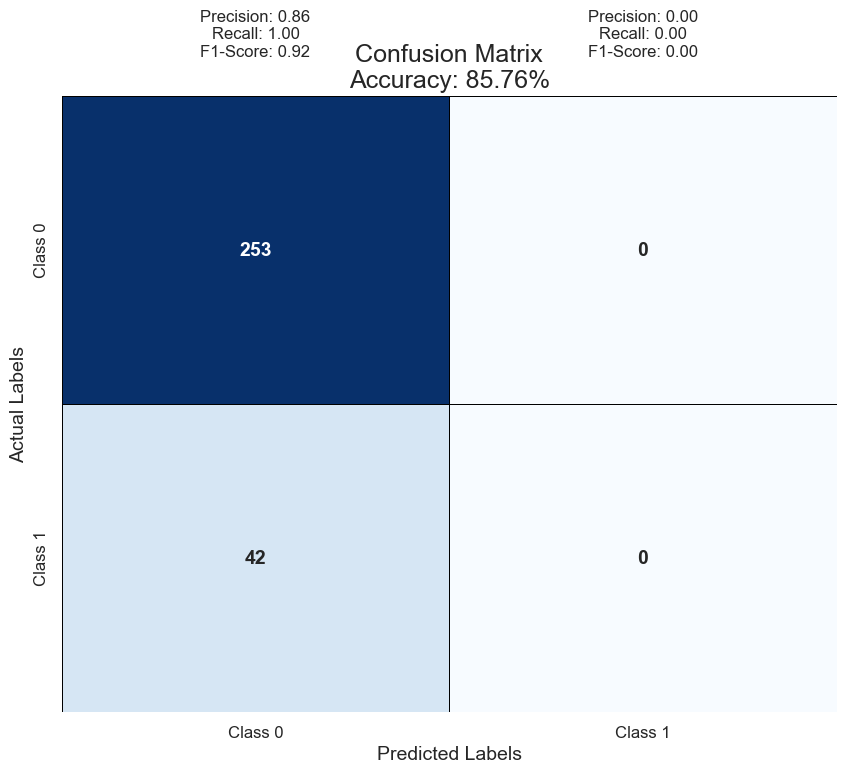

In [31]:
conf_matrix = np.array([[253, 0], [42, 0]])

# Improved Confusion Matrix Visualization
plt.figure(figsize=(10, 8))

# Create a heatmap with enhanced aesthetics
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            annot_kws={"size": 14, "weight": 'bold'}, 
            linewidths=.5, linecolor='black')

# Set plot title and labels with improved descriptions
plt.title('Confusion Matrix\nAccuracy: 85.76%', fontsize=18)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)

# Set tick labels for readability
plt.xticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], fontsize=12)
plt.yticks(ticks=[0.5, 1.5], labels=['Class 0', 'Class 1'], fontsize=12)

# Add text annotations for precision, recall, and F1-score
plt.text(0.5, -0.2, 'Precision: 0.86\nRecall: 1.00\nF1-Score: 0.92', 
         ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

plt.text(1.5, -0.2, 'Precision: 0.00\nRecall: 0.00\nF1-Score: 0.00', 
         ha='center', va='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Show the plot
plt.show()